In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from itertools import product

In [45]:
pd.read_csv('raw_data/Usernames - Sheet1.csv')

,@saylor
0,@icebergy_
1,@LSDinmycoffee
2,@Crypto_Chase
3,@Anbessa100
4,@jebus911
...,...
98,@kerneltrader
99,@jimtalbot
100,@PeterLBrandt
101,@TraderKoz


In [5]:
raw_df = pd.read_csv('../data/processed_data/new_vol_master_2023-03-09.csv',lineterminator='\n')
data = raw_df.drop('Unnamed: 0',axis=1)
data['date'] = pd.to_datetime(data['date'])

In [100]:
X

,date,negative_bert,neutral_bert,positive_bert,daily_tweets,MA7_Sentiment,MA20_Sentiment,MA50_Sentiment,BTC_price,BTC_trading_volume,Threshold_50,Threshold_20,Buy_Sell,BTC_volume_scaled,equity_held,bitcoin_held,cash_held
0,2021-01-01,0.085275,0.489181,0.425545,12561.859509,NaN,NaN,NaN,29374.152344,4.073030e+10,False,False,False,1.105181,1000.000000,0.000000,1000.000000
1,2021-01-02,0.143365,0.439075,0.417560,30124.352145,NaN,NaN,NaN,32127.267578,6.786542e+10,False,False,False,1.841468,1000.000000,0.000000,1000.000000
2,2021-01-03,0.148220,0.432023,0.419757,26167.331282,NaN,NaN,NaN,32782.023438,7.866524e+10,False,False,False,2.134511,1000.000000,0.000000,1000.000000
3,2021-01-04,0.101558,0.507526,0.390916,18041.199084,NaN,NaN,NaN,31971.914062,8.116348e+10,False,False,False,2.202299,1000.000000,0.000000,1000.000000
4,2021-01-05,0.088530,0.517456,0.394014,17473.551568,NaN,NaN,NaN,33992.429688,6.754732e+10,False,False,False,1.832837,1000.000000,0.000000,1000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,2023-04-09,0.095679,0.542367,0.361954,19042.164878,0.363498,0.372866,0.369414,28333.050781,1.217532e+10,False,False,False,0.330367,995.359316,0.000000,995.359316
829,2023-04-10,0.098105,0.503682,0.398212,62345.582976,0.367777,0.374040,0.370148,29652.980469,1.928240e+10,True,True,True,0.523211,995.359316,0.000176,990.127208
830,2023-04-11,0.093301,0.505432,0.401267,25547.228695,0.375183,0.374680,0.370740,30235.058594,2.012126e+10,True,True,True,0.545973,995.462021,0.000357,984.667483
831,2023-04-12,0.100743,0.536194,0.363062,22513.830501,0.375677,0.374030,0.370941,NaN,NaN,False,False,False,NaN,NaN,0.000000,NaN


In [ ]:
data

In [49]:
def data_prep(df,btc):
    
    X = df[['date']]
    X['date'] = pd.to_datetime(X['date'])
    btc['date'] = pd.to_datetime(btc['Date'])
    
    X['Daily_Average_Sentiment']=df['positive_bert']/df.iloc[:,1:].sum(axis=1)
    
    
    X['MA20_Sentiment'] = X['Daily_Average_Sentiment'].rolling(window=21).mean()
    X['MA50_Sentiment'] = X['Daily_Average_Sentiment'].rolling(window=51).mean()
    
    X['Threshold_50'] = X['Daily_Average_Sentiment']>X['MA50_Sentiment']
    X['Threshold_20'] = X['Daily_Average_Sentiment']>X['MA20_Sentiment']
    X['Buy_Sell'] = X['Threshold_50'] & X['Threshold_20']
    
    NX = X.merge(btc,how='inner',on='date')
    NNX= NX[['date','Daily_Average_Sentiment', 'MA50_Sentiment','MA20_Sentiment','Threshold_50','Threshold_20',
             'Buy_Sell','Adj Close']]
    
    return NNX

In [17]:
X = data
X['Threshold_50'] = X['positive_bert']>X['MA50_Sentiment']
X['Threshold_20'] = X['positive_bert']>X['MA20_Sentiment']
X['Buy_Sell'] = X['Threshold_50'] & X['Threshold_20']

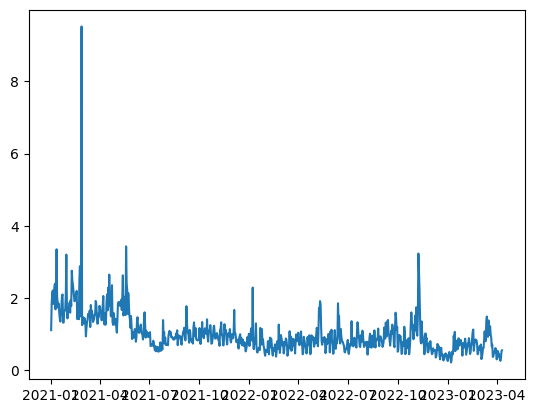

In [25]:
plt.plot(X['date'],X['BTC_volume_scaled'])

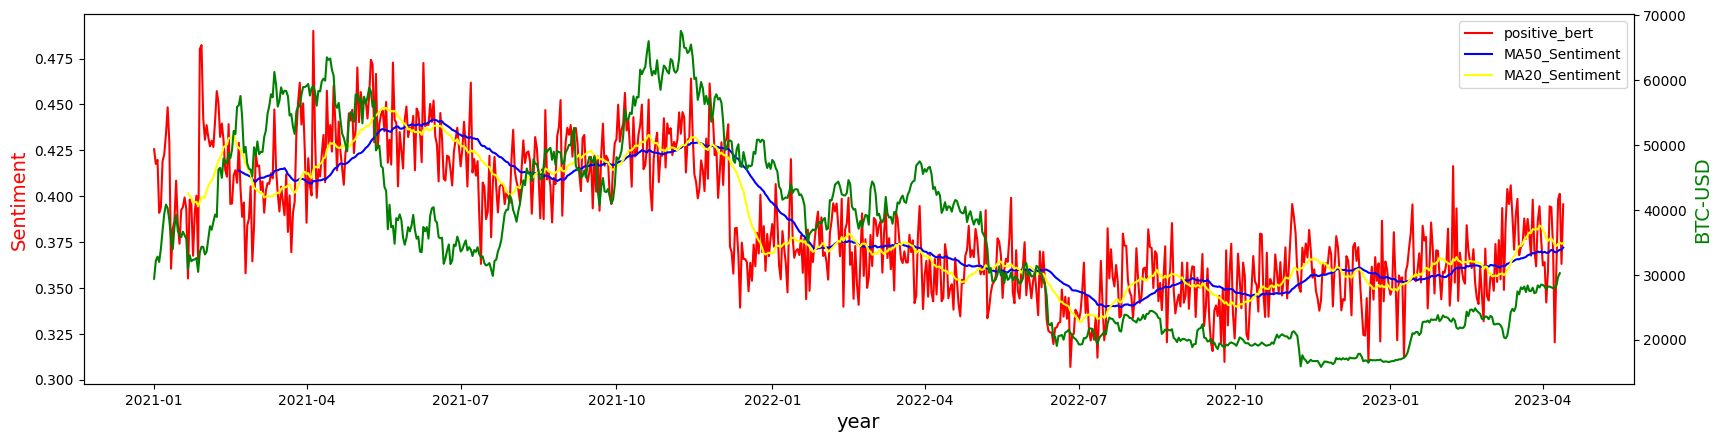

In [75]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(X['date'],X['positive_bert'],color="red",label='positive_bert')
ax.plot(X['date'],X['MA50_Sentiment'],color="blue",label='MA50_Sentiment')
ax.plot(X['date'],X['MA20_Sentiment'],color="yellow",label='MA20_Sentiment')
# set x-axis label
ax.set_xlabel("year", fontsize = 14)
# set y-axis label
ax.set_ylabel("Sentiment",color="red",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(X['date'],X['BTC_price'],color="green")
ax2.set_ylabel("BTC-USD",color="green",fontsize=14)


ax.legend()
fig.set_figwidth(20)
plt.show()

# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

In [11]:
buy = X.columns.get_loc("Buy_Sell")
X.iloc[1,buy]

False

In [28]:
X.head()

,date,negative_bert,neutral_bert,positive_bert,daily_tweets,MA7_Sentiment,MA20_Sentiment,MA50_Sentiment,BTC_price,BTC_trading_volume,Threshold_50,Threshold_20,Buy_Sell,BTC_volume_scaled
0,2021-01-01,0.085275,0.489181,0.425545,12561.859509,NaN,NaN,NaN,29374.152344,4.073030e+10,False,False,False,1.105181
1,2021-01-02,0.143365,0.439075,0.417560,30124.352145,NaN,NaN,NaN,32127.267578,6.786542e+10,False,False,False,1.841468
2,2021-01-03,0.148220,0.432023,0.419757,26167.331282,NaN,NaN,NaN,32782.023438,7.866524e+10,False,False,False,2.134511
3,2021-01-04,0.101558,0.507526,0.390916,18041.199084,NaN,NaN,NaN,31971.914062,8.116348e+10,False,False,False,2.202299
4,2021-01-05,0.088530,0.517456,0.394014,17473.551568,NaN,NaN,NaN,33992.429688,6.754732e+10,False,False,False,1.832837


In [36]:
X.columns.get_loc("BTC_price")

8

In [44]:
X['equity_held'] = X['BTC_trading_volume']

In [101]:
X.head()

,date,negative_bert,neutral_bert,positive_bert,daily_tweets,MA7_Sentiment,MA20_Sentiment,MA50_Sentiment,BTC_price,BTC_trading_volume,Threshold_50,Threshold_20,Buy_Sell,BTC_volume_scaled,equity_held,bitcoin_held,cash_held
0,2021-01-01,0.085275,0.489181,0.425545,12561.859509,NaN,NaN,NaN,29374.152344,4.073030e+10,False,False,False,1.105181,1000.0,0.0,1000.0
1,2021-01-02,0.143365,0.439075,0.417560,30124.352145,NaN,NaN,NaN,32127.267578,6.786542e+10,False,False,False,1.841468,1000.0,0.0,1000.0
2,2021-01-03,0.148220,0.432023,0.419757,26167.331282,NaN,NaN,NaN,32782.023438,7.866524e+10,False,False,False,2.134511,1000.0,0.0,1000.0
3,2021-01-04,0.101558,0.507526,0.390916,18041.199084,NaN,NaN,NaN,31971.914062,8.116348e+10,False,False,False,2.202299,1000.0,0.0,1000.0
4,2021-01-05,0.088530,0.517456,0.394014,17473.551568,NaN,NaN,NaN,33992.429688,6.754732e+10,False,False,False,1.832837,1000.0,0.0,1000.0


In [61]:
def baseline_strat(data,total_amt=1000,daily_amt = 100,start_btc=0,):
    '''strategy is to start with $1000, then invest 10 * scaled volume 
    for every day that both sentiment's are above the average and sell if either fall below.'''
    
    #set up columns for trading values 
    data2 = data.copy()
    data2['bitcoin_held']=start_btc
    data2['cash_held']= total_amt
    data2['equity_held'] = total_amt
    mean_volume = data2['BTC_trading_volume'].mean()
    data2['BTC_volume_scaled']= data2['BTC_trading_volume']/mean_volume
    
    #locate the correct columns to use in the strategy
    btc_price = data2.columns.get_loc("BTC_price")
    buy = data2.columns.get_loc("Buy_Sell")
    btc_held = data2.columns.get_loc("bitcoin_held")
    cash_held = data2.columns.get_loc("cash_held")
    vol_scaled = data2.columns.get_loc("BTC_volume_scaled")
    
    length = len(data2)

    #implement the strategy
    for i in range(length): 
        if data2.iloc[i,buy]:
            data2.iloc[i,btc_held] = data2.iloc[i-1,btc_held] + data2.iloc[i,vol_scaled]*daily_amt/data2.iloc[i,btc_price]
            data2.iloc[i,cash_held] = data2.iloc[i-1,cash_held] - data2.iloc[i,vol_scaled]*daily_amt
        else:
            data2.iloc[i,cash_held] = data2.iloc[i-1,btc_held]*data2.iloc[i,btc_price] + data2.iloc[i-1,cash_held]

    data2['equity_held'] = data2['bitcoin_held']*data2['BTC_price']+data2['cash_held']
    final_equity = data2['equity_held'][length-1]
    print (f'This strategy made {final_equity-1000} dollars.')
    return data2
    
#secondly consider:
#what to do with nan values (sentiment and price specifically)
#difference between buy and sell (makes this strategy completely useless IMO)
#consider changing the times for the sentiment to be averaged  - use the moving average as a hyper paramter in the function
#consider a scaled system which takes into account the rate of change of sentiment
#consider adding in other features for the model
#create custom function for the scaler due to volume - exponential perhaps? can also grid search this
# why doesn't this strategy make money as if it was on a per tweet basis? More granluar data is more helpful - to pick up on 
#small and rapid changes?
#save the performance of all strategies to hopefully begin to understand some underlying patterns behind the reasons for the profitability 

In [116]:
X1 = X.iloc[:-2]

In [117]:
X1

,date,negative_bert,neutral_bert,positive_bert,daily_tweets,MA7_Sentiment,MA20_Sentiment,MA50_Sentiment,BTC_price,BTC_trading_volume,...,Threshold_20,Buy_Sell,BTC_volume_scaled,equity_held,bitcoin_held,cash_held,5_Sentiment,15_Sentiment,Threshold_5,Threshold_15
0,2021-01-01,0.085275,0.489181,0.425545,12561.859509,NaN,NaN,NaN,29374.152344,4.073030e+10,...,False,False,1.105181,1000.000000,0.000000,1000.000000,NaN,NaN,False,False
1,2021-01-02,0.143365,0.439075,0.417560,30124.352145,NaN,NaN,NaN,32127.267578,6.786542e+10,...,False,False,1.841468,1000.000000,0.000000,1000.000000,NaN,NaN,False,False
2,2021-01-03,0.148220,0.432023,0.419757,26167.331282,NaN,NaN,NaN,32782.023438,7.866524e+10,...,False,False,2.134511,1000.000000,0.000000,1000.000000,NaN,NaN,False,False
3,2021-01-04,0.101558,0.507526,0.390916,18041.199084,NaN,NaN,NaN,31971.914062,8.116348e+10,...,False,False,2.202299,1000.000000,0.000000,1000.000000,NaN,NaN,False,False
4,2021-01-05,0.088530,0.517456,0.394014,17473.551568,NaN,NaN,NaN,33992.429688,6.754732e+10,...,False,False,1.832837,1000.000000,0.000000,1000.000000,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,2023-04-07,0.099219,0.528576,0.372205,17644.852559,0.370499,0.375615,0.370440,27925.859375,1.086168e+10,...,False,False,0.294722,995.359316,0.000000,995.359316,0.370949,0.375613,True,False
827,2023-04-08,0.137833,0.541828,0.320338,19875.076816,0.363534,0.373353,0.369455,27947.794922,9.373256e+09,...,False,False,0.254335,995.359316,0.000000,995.359316,0.363675,0.371412,False,False
828,2023-04-09,0.095679,0.542367,0.361954,19042.164878,0.363498,0.372866,0.369414,28333.050781,1.217532e+10,...,False,False,0.330367,995.359316,0.000000,995.359316,0.366997,0.370334,False,False
829,2023-04-10,0.098105,0.503682,0.398212,62345.582976,0.367777,0.374040,0.370148,29652.980469,1.928240e+10,...,True,True,0.523211,995.359316,0.000176,990.127208,0.373514,0.372248,True,True


In [111]:
X1.tail()

,date,negative_bert,neutral_bert,positive_bert,daily_tweets,MA7_Sentiment,MA20_Sentiment,MA50_Sentiment,BTC_price,BTC_trading_volume,...,Threshold_20,Buy_Sell,BTC_volume_scaled,equity_held,bitcoin_held,cash_held,5_Sentiment,15_Sentiment,Threshold_5,Threshold_15
826,2023-04-07,0.099219,0.528576,0.372205,17644.852559,0.370499,0.375615,0.370440,27925.859375,1.086168e+10,...,False,False,0.294722,995.359316,0.000000,995.359316,0.370949,0.375613,True,False
827,2023-04-08,0.137833,0.541828,0.320338,19875.076816,0.363534,0.373353,0.369455,27947.794922,9.373256e+09,...,False,False,0.254335,995.359316,0.000000,995.359316,0.363675,0.371412,False,False
828,2023-04-09,0.095679,0.542367,0.361954,19042.164878,0.363498,0.372866,0.369414,28333.050781,1.217532e+10,...,False,False,0.330367,995.359316,0.000000,995.359316,0.366997,0.370334,False,False
829,2023-04-10,0.098105,0.503682,0.398212,62345.582976,0.367777,0.374040,0.370148,29652.980469,1.928240e+10,...,True,True,0.523211,995.359316,0.000176,990.127208,0.373514,0.372248,True,True
830,2023-04-11,0.093301,0.505432,0.401267,25547.228695,0.375183,0.374680,0.370740,30235.058594,2.012126e+10,...,True,True,0.545973,995.462021,0.000357,984.667483,0.374652,0.372447,True,True


In [272]:
def baseline_strat_varied_ma(data,total_amt=1000,daily_amt = 100,start_btc=0,ma1 = 20, ma2 = 50):
    '''strategy is to start with $1000, then invest 10 * scaled volume 
    for every day that both sentiment's are above the average and sell if either fall below.
    This strategy is to discover the optimal date ranges for the sentiments.
    '''
    max_ma = max(ma1, ma2)
    data = data[max_ma:]
    
    data[f'MA{ma1}_Sentiment'] = data["positive_bert"].rolling(window=(ma1+1)).mean()
    data[f'MA{ma2}_Sentiment'] = data["positive_bert"].rolling(window=(ma2+1)).mean()
    
    data[f'Threshold_{ma1}'] = data['positive_bert']>data[f'MA{ma1}_Sentiment']
    data[f'Threshold_{ma2}'] = data['positive_bert']>data[f'MA{ma2}_Sentiment']
    print(ma1,ma2)
    data['Buy_Sell'] = data[f'Threshold_{ma2}'] & data[f'Threshold_{ma1}']
    
    data2 = data.copy()
    data2['bitcoin_held']=start_btc
    data2['cash_held']= total_amt
    data2['equity_held'] = total_amt
    mean_volume = data2['BTC_trading_volume'].mean()
    data2['BTC_volume_scaled']= data2['BTC_trading_volume']/mean_volume
    
    #locate the correct columns to use in the strategy
    btc_price = data2.columns.get_loc("BTC_price")
    buy = data2.columns.get_loc("Buy_Sell")
    btc_held = data2.columns.get_loc("bitcoin_held")
    cash_held = data2.columns.get_loc("cash_held")
    vol_scaled = data2.columns.get_loc("BTC_volume_scaled")
    
    length = len(data2)

    #implement the strategy
    for i in range(length): 
        if data2.iloc[i,buy]:
            data2.iloc[i,btc_held] = data2.iloc[i-1,btc_held] + data2.iloc[i,vol_scaled]*daily_amt/data2.iloc[i,btc_price]
            data2.iloc[i,cash_held] = data2.iloc[i-1,cash_held] - data2.iloc[i,vol_scaled]*daily_amt
        else:
            data2.iloc[i,cash_held] = data2.iloc[i-1,btc_held]*data2.iloc[i,btc_price] + data2.iloc[i-1,cash_held]

    data2['equity_held'] = data2['bitcoin_held']*data2['BTC_price']+data2['cash_held']
    final_equity = data2['equity_held'][length-1]
    print (f'This strategy made {final_equity-1000} dollars.')
    return data2

In [159]:
data_test = baseline_strat_varied_ma(X1,ma1 = 5, ma2 = 15)

This strategy made 80.5022757815616 dollars.


IndexError: invalid index to scalar variable.

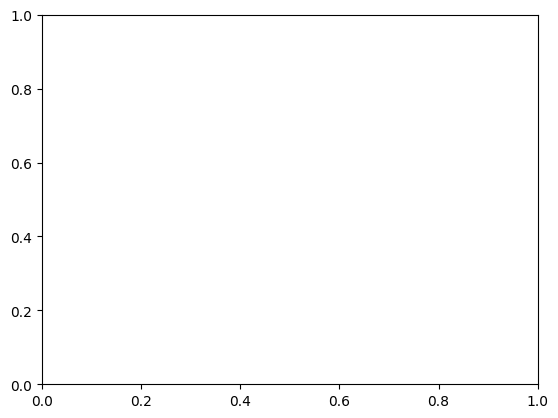

In [160]:
equity_vs_price(data_test)

In [186]:
resultsdf1 = pd.DataFrame({'ma1' : [2,3,4,5,6,7,8,9,10,11,12,15,18,20,25,30,35,40,50]
                    })
resultsdf2 = pd.DataFrame({'ma2' : [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,90,100,150]})

In [190]:
resultsdf = pd.merge(resultsdf1, resultsdf2, how = 'outer')
resultsdf

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [204]:
ma1 = [2,3,4,5,6,7,8,9,10,12,15,18,20,25,30,35,40,50]
ma2 = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,90,100,150]
resultsdf = pd.DataFrame(list(product(ma1, ma2)), columns=['ma1', 'ma2'])
resultsdf['equity'] = resultsdf['ma2']

In [237]:

for index, series in resultsdf.iterrows():
    resultsdf['equity'].iloc[index] = 
    (baseline_strat_varied_ma(X1,ma1 = series[0], ma2 = series[1])['equity_held'][length-1]-1000)

2 5
This strategy made 94.35681433122045 dollars.
2 10
This strategy made 150.16964376168653 dollars.
2 15
This strategy made 160.02886478372034 dollars.
2 20
This strategy made 47.29356671395317 dollars.
2 25
This strategy made -0.07695344544572436 dollars.
2 30
This strategy made -109.14923120421429 dollars.
2 35
This strategy made -106.82027129556536 dollars.
2 40
This strategy made -89.52120401190246 dollars.
2 45
This strategy made -102.03459249004118 dollars.
2 50
This strategy made -101.46516011779113 dollars.
2 55
This strategy made -83.10575192738816 dollars.
2 60
This strategy made -79.03456976556231 dollars.
2 65
This strategy made -77.83230079623297 dollars.
2 70
This strategy made -30.993028120956637 dollars.
2 75
This strategy made -24.30229735630155 dollars.
2 80
This strategy made -4.107702448466512 dollars.
2 90
This strategy made -60.10358211535788 dollars.
2 100
This strategy made -64.42098774604574 dollars.
2 150
This strategy made -11.514435108336102 dollars.
3 5
T

This strategy made -59.20765881154557 dollars.
10 40
This strategy made -8.030064619682662 dollars.
10 45
This strategy made -53.68709381053213 dollars.
10 50
This strategy made -29.925060631802353 dollars.
10 55
This strategy made -5.30887460996928 dollars.
10 60
This strategy made 33.52251255359738 dollars.
10 65
This strategy made 14.771638711088258 dollars.
10 70
This strategy made 41.19925146125843 dollars.
10 75
This strategy made 6.514639130178011 dollars.
10 80
This strategy made 21.718571577753096 dollars.
10 90
This strategy made 16.77169960820413 dollars.
10 100
This strategy made 22.09599104211975 dollars.
10 150
This strategy made -37.19167150869191 dollars.
12 5
This strategy made 67.23071784660374 dollars.
12 10
This strategy made 231.27456727005847 dollars.
12 15
This strategy made 358.3412359268916 dollars.
12 20
This strategy made 22.914682760839582 dollars.
12 25
This strategy made -20.292444508007065 dollars.
12 30
This strategy made -106.68755357414591 dollars.
12 

This strategy made -372.7652815383376 dollars.
40 50
This strategy made -335.5923991432437 dollars.
40 55
This strategy made -243.02367053007993 dollars.
40 60
This strategy made -283.793238735263 dollars.
40 65
This strategy made -301.9341021447275 dollars.
40 70
This strategy made -233.76949250023029 dollars.
40 75
This strategy made -272.6293550916714 dollars.
40 80
This strategy made -248.358147257768 dollars.
40 90
This strategy made -271.59186847028957 dollars.
40 100
This strategy made -269.7307000611031 dollars.
40 150
This strategy made -132.51944396915724 dollars.
50 5
This strategy made -27.019086761872813 dollars.
50 10
This strategy made -29.925060631802353 dollars.
50 15
This strategy made -212.18134175218074 dollars.
50 20
This strategy made -161.4050805096149 dollars.
50 25
This strategy made -254.45485913676634 dollars.
50 30
This strategy made -364.218656558131 dollars.
50 35
This strategy made -333.09310146971507 dollars.
50 40
This strategy made -335.5923991432437 d

In [262]:
ma1_mask = resultsdf['ma1'] < 30
ma2_mask = resultsdf['ma2'] < 30
resultsdf2 = resultsdf[ma1_mask & ma2_mask]
resultsdf2.reset_index(inplace = True)

In [266]:
resultsdf2.iloc[47]

index     173.000000
ma1        12.000000
ma2        15.000000
equity    358.341236
Name: 47, dtype: float64

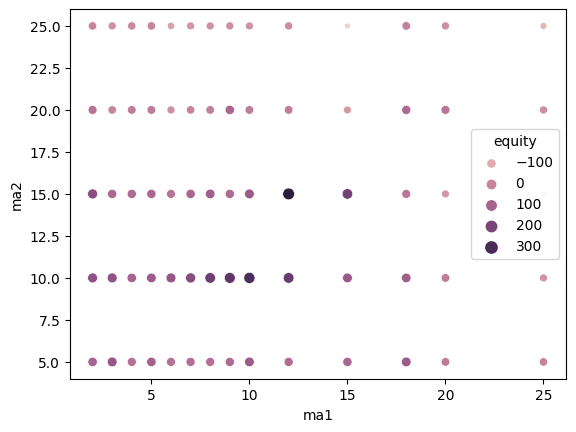

In [256]:
sns.scatterplot(data = resultsdf2, x = 'ma1', y = 'ma2', size = 'equity', hue = 'equity');

In [267]:


def equity_vs_price(X):
    fig,ax = plt.subplots()

    ax.plot(X['date'],X['BTC_price'],color='#2D8BBA')
    ax.set_xlabel("Month", fontsize = 14)
    ax.set_ylabel("Bitcoin Price",color="#2D8BBA",fontsize=14)

    ax2=ax.twinx()
    ax2.plot(X['date'],X['equity_held'],color="#FF914D")
    ax2.set_ylabel("equity held",color='#FF914D',fontsize=14)

    ax2.axhline(y=1000, c="r", linestyle='--',linewidth=2, zorder=0)


    ax.legend()
    fig.set_figwidth(12)
    return plt.show();

12 15
This strategy made 358.3412359268916 dollars.


12 15


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


This strategy made 358.3412359268916 dollars.


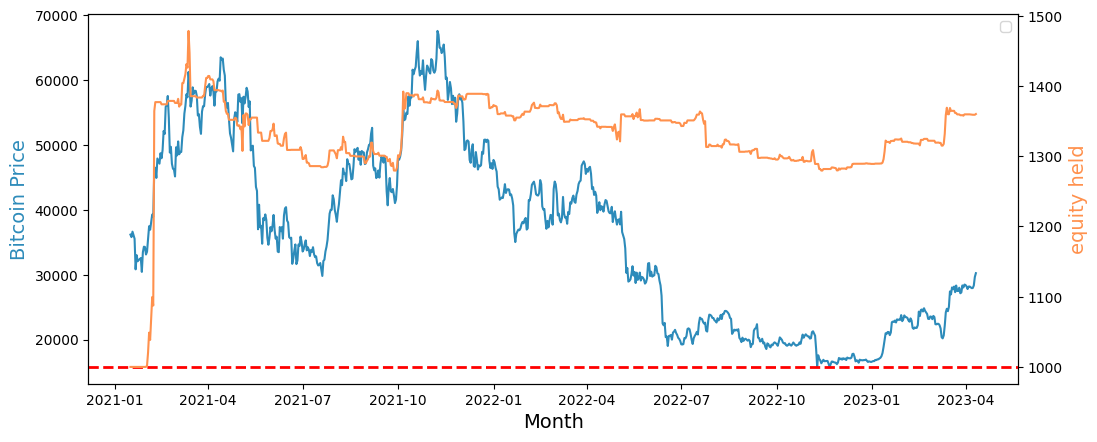

In [273]:
strat_12_15 = baseline_strat_varied_ma(X1,ma1 = 12, ma2 = 15)
equity_vs_price(strat_12_15)

In [271]:
strat_12_15

358.3412359268916

This strategy made nan dollars.


<Figure size 640x960 with 0 Axes>

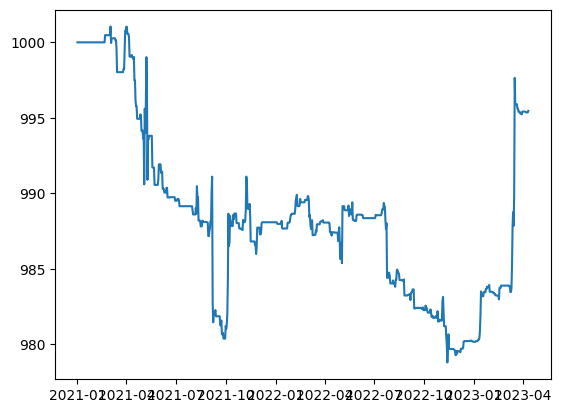

<Figure size 640x960 with 0 Axes>

In [86]:
# A = data_prep(df,btest)
X = baseline_strat(X,total_amt=1000,daily_amt=10)
figure = plt.plot(X['date'],X['equity_held'])
plt.figure(figsize=(8, 12), dpi=80)

AttributeError: 'list' object has no attribute 'show'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


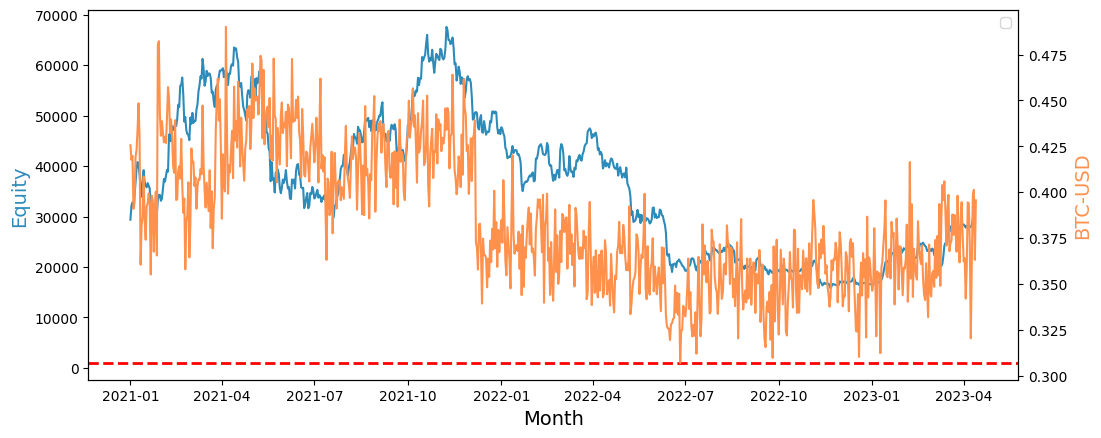

In [94]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
# ax.plot(X['date'],X['Daily_Average_Sentiment'],color="red",label='Daily_Average_Sentiment')
# ax.plot(X['date'],X['MA50_Sentiment'],color="blue",label='MA50_Sentiment')
# ax.plot(X['date'],X['MA20_Sentiment'],color="yellow",label='MA20_Sentiment')
ax.plot(X['date'],X['BTC_price'],color='#2D8BBA')
# set x-axis label
ax.set_xlabel("Month", fontsize = 14)
# set y-axis label
ax.set_ylabel("Equity",color="#2D8BBA",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(X['date'],X['positive_bert'],color="#FF914D")
ax2.set_ylabel("BTC-USD",color='#FF914D',fontsize=14)

ax.axhline(y=1000, c="r", linestyle='--',linewidth=2, zorder=0)


ax.legend()
fig.set_figwidth(12)
# fig.set_figheight(12)
plt.show()

## Per day strat

In [98]:
def baseline_strat_per_day(Y,total_amt=1000,daily_amt = 100,start_btc=0):
    X = Y.copy()
    X['bitcoin_held']=start_btc
    X['cash_held']= total_amt
    
    X['Threshold_50'] = X['positive_bert']>X['MA50_Sentiment']
    X['Threshold_20'] = X['positive_bert']>X['MA20_Sentiment']
    X['Buy_Sell'] = X['Threshold_50'] & X['Threshold_20']
    
    btc = X.columns.get_loc("BTC_price")
    buy = X.columns.get_loc("Buy_Sell")
    btc_held = X.columns.get_loc("bitcoin_held")
    cash_held = X.columns.get_loc("cash_held")
    
    
    for i in range(len(X)): 
        if X.iloc[i,buy]:
            X.iloc[i,btc_held] = X.iloc[i-1,btc_held] + daily_amt/X.iloc[i,btc]
            X.iloc[i,cash_held] = X.iloc[i-1,cash_held] - daily_amt
        else:
            X.iloc[i,cash_held] = X.iloc[i-1,btc_held]*X.iloc[i,btc] + X.iloc[i-1,cash_held]
    #         X.iloc[i,btc_held] = 0

    X['equity_held'] = X['bitcoin_held']*X['BTC_price']+X['cash_held']
    return X

In [99]:
Y = baseline_strat_per_day(vol_data,total_amt=1000,daily_amt=100)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


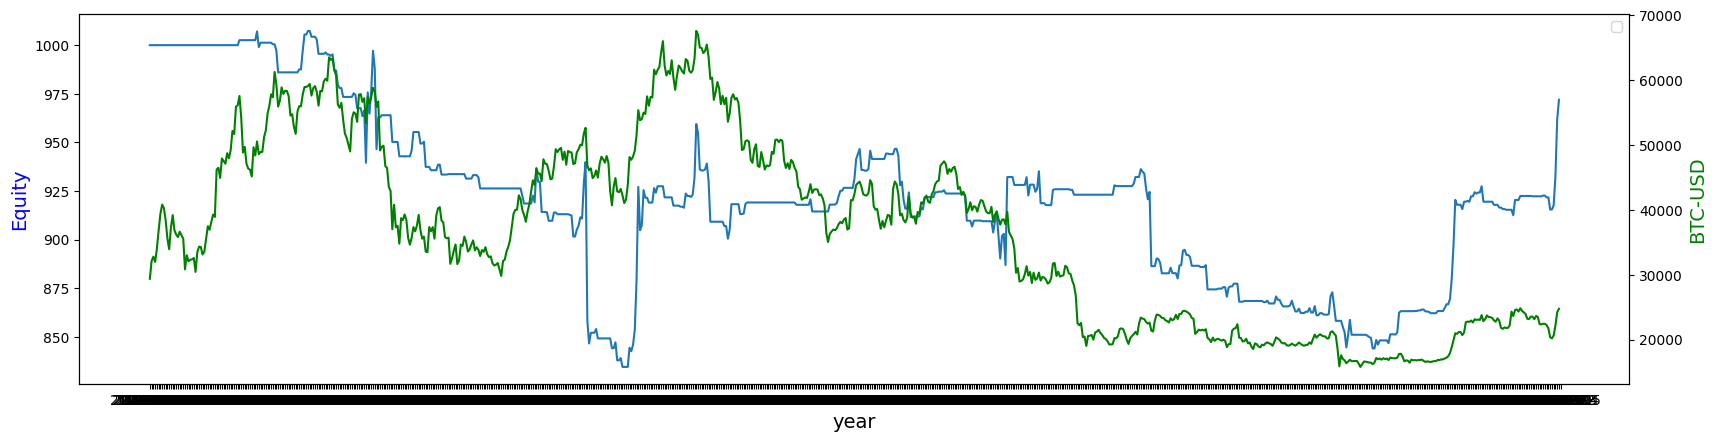

In [103]:
# per_day

fig,ax = plt.subplots()
# make a plot

ax.plot(Y['date'],Y['equity_held'])
# set x-axis label
ax.set_xlabel("year", fontsize = 14)
ax2.xaxis.set_major_locator(md.MonthLocator())
# set y-axis label
ax.set_ylabel("Equity",color="blue",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Y['date'],Y['BTC_price'],color="green")
ax2.set_ylabel("BTC-USD",color="green",fontsize=14)


ax.legend()
fig.set_figwidth(20)
plt.show()

# Update Graph

# Short Strategy

In [40]:
def short_strat(X,total_amt=1000,daily_amt = 100,start_btc=0):
    
    X['bitcoin_held']=start_btc
    X['cash_held']= total_amt
    btc = X.columns.get_loc("Adj Close")
    buy = X.columns.get_loc("Buy_Sell")
    btc_held = X.columns.get_loc("bitcoin_held")
    cash_held = X.columns.get_loc("cash_held")

    for i in range(len(X)):
#         if X.iloc[i,cash_hel
        if X.iloc[i,buy]:
            if X.iloc[i-1,btc_held]<0:
                X.iloc[i,cash_held] = -X.iloc[i-1,btc_held]*X.iloc[i,btc]
                X.iloc[i,btc_held] = 0
            X.iloc[i,btc_held] = X.iloc[i-1,btc_held] + daily_amt/X.iloc[i,btc]
            X.iloc[i,cash_held] = X.iloc[i-1,cash_held] - min(daily_amt,X.iloc[i-1,cash_held])
        else:
            X.iloc[i,cash_held] = X.iloc[i-1,btc_held]*X.iloc[i,btc] + X.iloc[i-1,cash_held] - daily_amt
            X.iloc[i,btc_held] = -min(daily_amt,X.iloc[i-1,cash_held])/X.iloc[i,btc] 

    X['equity_held'] = X['bitcoin_held']*X['Adj Close']+X['cash_held']
    return X

/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = pd.to_datetime(X['date'])
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X['Daily_Average_Sentiment']=df['positive_bert']/df.iloc[:,1:].sum(axis=1)
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

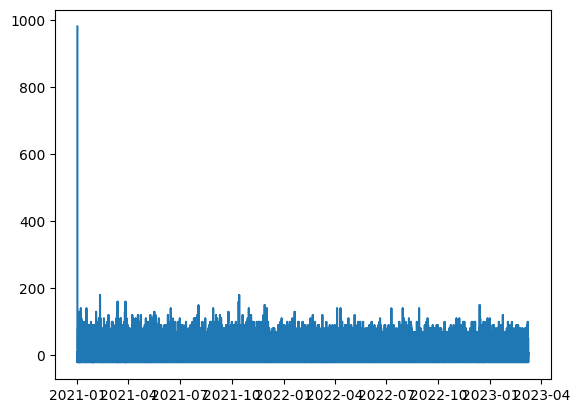

In [84]:
A = data_prep(df,btest)
X_short = short_strat(A,total_amt=1000,daily_amt = 10,start_btc=0)
plt.plot(X_short['date'],X_short['equity_held'])

In [44]:
X

,date,Daily_Average_Sentiment,MA50_Sentiment,MA20_Sentiment,Threshold_50,Threshold_20,Buy_Sell,Adj Close,bitcoin_held,cash_held,equity_held
0,2022-01-01,0.397410,NaN,NaN,False,False,False,47686.812500,-0.000210,990.000000,980.000000
1,2022-01-02,0.390024,NaN,NaN,False,False,False,47345.218750,-0.000211,970.071633,960.071633
2,2022-01-03,0.419594,NaN,NaN,False,False,False,46458.117188,-0.000215,950.259002,940.259002
3,2022-01-04,0.398603,NaN,NaN,False,False,False,45897.574219,-0.000218,930.379657,920.379657
4,2022-01-05,0.368357,NaN,NaN,False,False,False,43569.003906,-0.000230,910.886998,900.886998
...,...,...,...,...,...,...,...,...,...,...,...
176,2022-06-26,0.321051,0.352555,0.341142,False,False,False,21027.294922,0.000760,-26.150003,-10.164127
177,2022-06-27,0.321986,0.351254,0.339868,False,False,False,20735.478516,0.001261,-20.385979,5.764024
178,2022-06-28,0.328778,0.351085,0.339160,False,False,False,20280.634766,0.001005,-4.809590,15.576389
179,2022-06-29,0.340401,0.351037,0.337661,False,True,False,20104.023438,0.000239,5.398860,10.208450


In [24]:
X = data_prep(df,btest)
total_amt = 1000
daily_amt = 100
X['bitcoin_held']=0
X['cash_held']= total_amt
btc = X.columns.get_loc("Adj Close")
buy = X.columns.get_loc("Buy_Sell")
btc_held = X.columns.get_loc("bitcoin_held")
cash_held = X.columns.get_loc("cash_held")

for i in range(len(X)): 
    if X.iloc[i,buy]:
        X.iloc[i,btc_held] = X.iloc[i-1,btc_held] + daily_amt/X.iloc[i,btc]
        X.iloc[i,cash_held] = X.iloc[i-1,cash_held] - daily_amt
    else:
        X.iloc[i,cash_held] = X.iloc[i-1,btc_held]*X.iloc[i,btc] + X.iloc[i-1,cash_held] - daily_amt
        X.iloc[i,btc_held] = -daily_amt/X.iloc[i,btc] 
X
# X['equity_held'] = X['bitcoin_held']*X['Adj Close']+X['cash_held']

/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = pd.to_datetime(X['date'])
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Daily_Average_Sentiment']=df['positive_bert']/df.iloc[:,1:].sum(axis=1)
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:10: SettingWithCopyWarning: 
A value is trying to be set on a co

,date,Daily_Average_Sentiment,MA50_Sentiment,MA20_Sentiment,Threshold_50,Threshold_20,Buy_Sell,Adj Close,bitcoin_held,cash_held
0,2022-01-01,0.397410,NaN,NaN,False,False,False,47686.812500,-0.002097,900.000000
1,2022-01-02,0.390024,NaN,NaN,False,False,False,47345.218750,-0.002112,700.716327
2,2022-01-03,0.419594,NaN,NaN,False,False,False,46458.117188,-0.002152,502.590015
3,2022-01-04,0.398603,NaN,NaN,False,False,False,45897.574219,-0.002179,303.796571
4,2022-01-05,0.368357,NaN,NaN,False,False,False,43569.003906,-0.002295,108.869977
...,...,...,...,...,...,...,...,...,...,...
176,2022-06-26,0.321051,0.352555,0.341142,False,False,False,21027.294922,-0.004756,-26096.303294
177,2022-06-27,0.321986,0.351254,0.339868,False,False,False,20735.478516,-0.004823,-26294.915496
178,2022-06-28,0.328778,0.351085,0.339160,False,False,False,20280.634766,-0.004931,-26492.721943
179,2022-06-29,0.340401,0.351037,0.337661,False,True,False,20104.023438,-0.004974,-26691.851105


In [18]:
tomerge2 = pd.read_csv('raw_data/data_with_datetime_tomerge2.csv', lineterminator='\n')



FileNotFoundError: [Errno 2] No such file or directory: 'raw_data/data_with_datetime_tomerge2.csv'

In [27]:
!pwd

/Users/suraj/code/giadapi/crypto


In [ ]:
def plot_big(X):
    if X['Threshold']
    